# Full-time Scores in the Premier League

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("../data/fivethirtyeight/spi_matches.csv")
# df = df[(df['league_id'] == 2412) | (df['league_id'] == 2411)]
df = df[df['league_id'] == 2411]
df = df[["season", "league_id", "team1", "team2", "score1", "score2", "date"]].dropna()
df.head()

,season,league_id,team1,team2,score1,score2,date
12,2016,2411,Hull City,Leicester City,2.0,1.0,2016-08-13
13,2016,2411,Southampton,Watford,1.0,1.0,2016-08-13
14,2016,2411,Crystal Palace,West Bromwich Albion,0.0,1.0,2016-08-13
15,2016,2411,Middlesbrough,Stoke City,1.0,1.0,2016-08-13
16,2016,2411,Burnley,Swansea City,0.0,1.0,2016-08-13


## Exploratory Data Analysis

In [2]:
df[["score1", "score2"]].mean()

score1    1.516230
score2    1.230366
dtype: float64

In [3]:
df[df['season'] == 2020][["score1", "score2"]].mean()

score1    1.352632
score2    1.342105
dtype: float64

While there is a considerably greater number of goals scored at home. The 2020-21 Season seems to exempt from this advantage. The Covid-19 Pandemic causing fans to be absent from stadiums must have affected this considerably.

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 5
mpl.rcParams['ytick.labelsize'] = 6

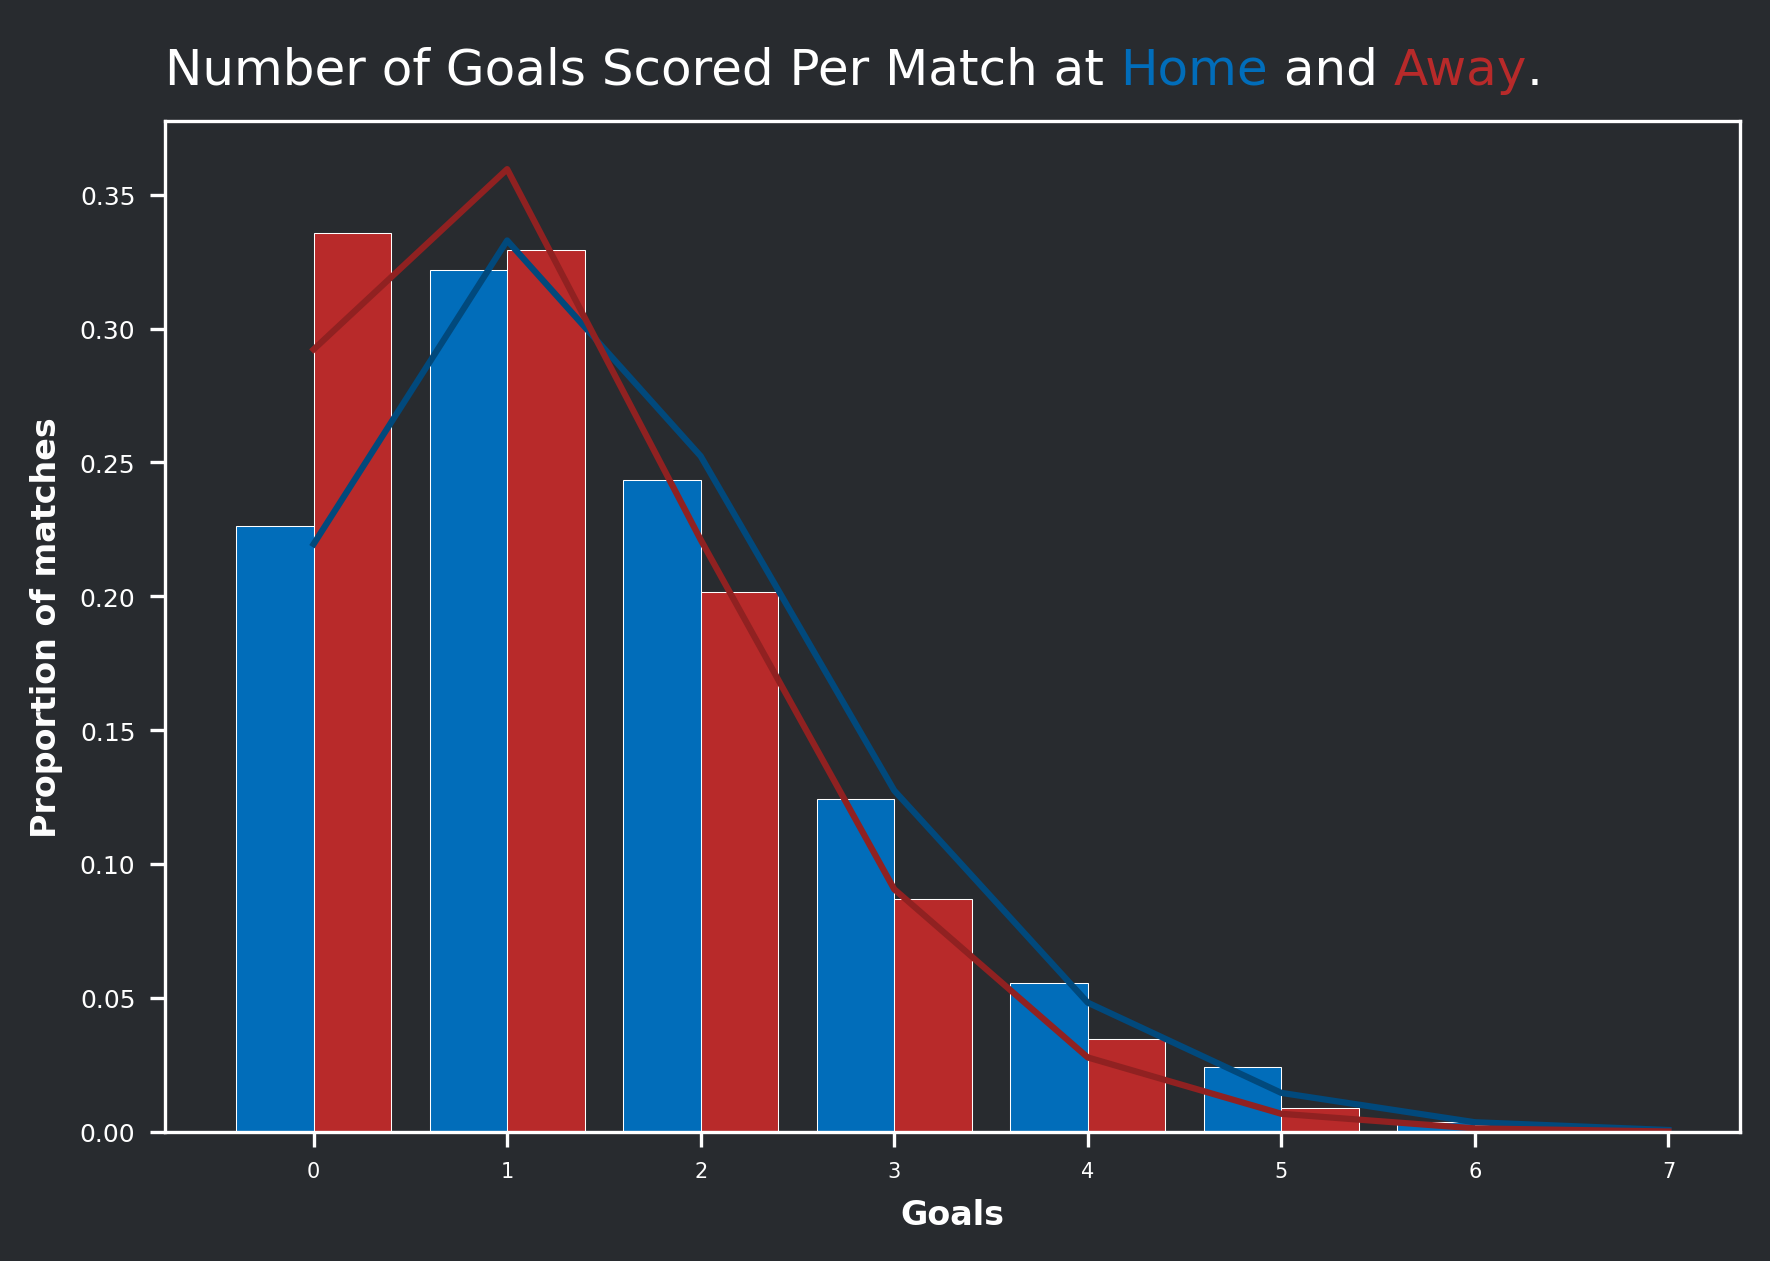

In [8]:
from scipy.stats import poisson

fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

max_goals = 8
_, _, _ = ax.hist(
    df[df['season'] != 2020][["score1", "score2"]].values, label=["Home", "Away"],
    bins=np.arange(0, max_goals)-.5, density=True,
    color=['#016DBA', '#B82A2A'], edgecolor='w', linewidth=0.25, alpha=1)

home_poisson = poisson.pmf(range(max_goals), df["score1"].mean())
away_poisson = poisson.pmf(range(max_goals), df["score2"].mean())

ax.plot(
    [i for i in range(0, max_goals)],
    home_poisson,
    linestyle="-",
    color="#01497c",
    label="Home Poisson",
)

ax.plot(
    [i for i in range(0, max_goals)],
    away_poisson,
    linestyle="-",
    color="#902121",
    label="Away Poisson",
)

ax.set_xticks(np.arange(0, max_goals), minor=False)
ax.set_xlabel(
    "Goals", fontfamily=title_font,
    fontweight="bold", fontsize=8, color=text_color)
ax.set_ylabel(
    "Proportion of matches", fontfamily=title_font,
    fontweight="bold", fontsize=8, color=text_color)

fig_text(x=0.1, y=1.025,
        s="Number of Goals Scored Per Match at <Home> and <Away>.",
        highlight_textprops=[
            {"color": '#016DBA'},
            {"color": '#B82A2A'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font,
        color=text_color, alpha=1)

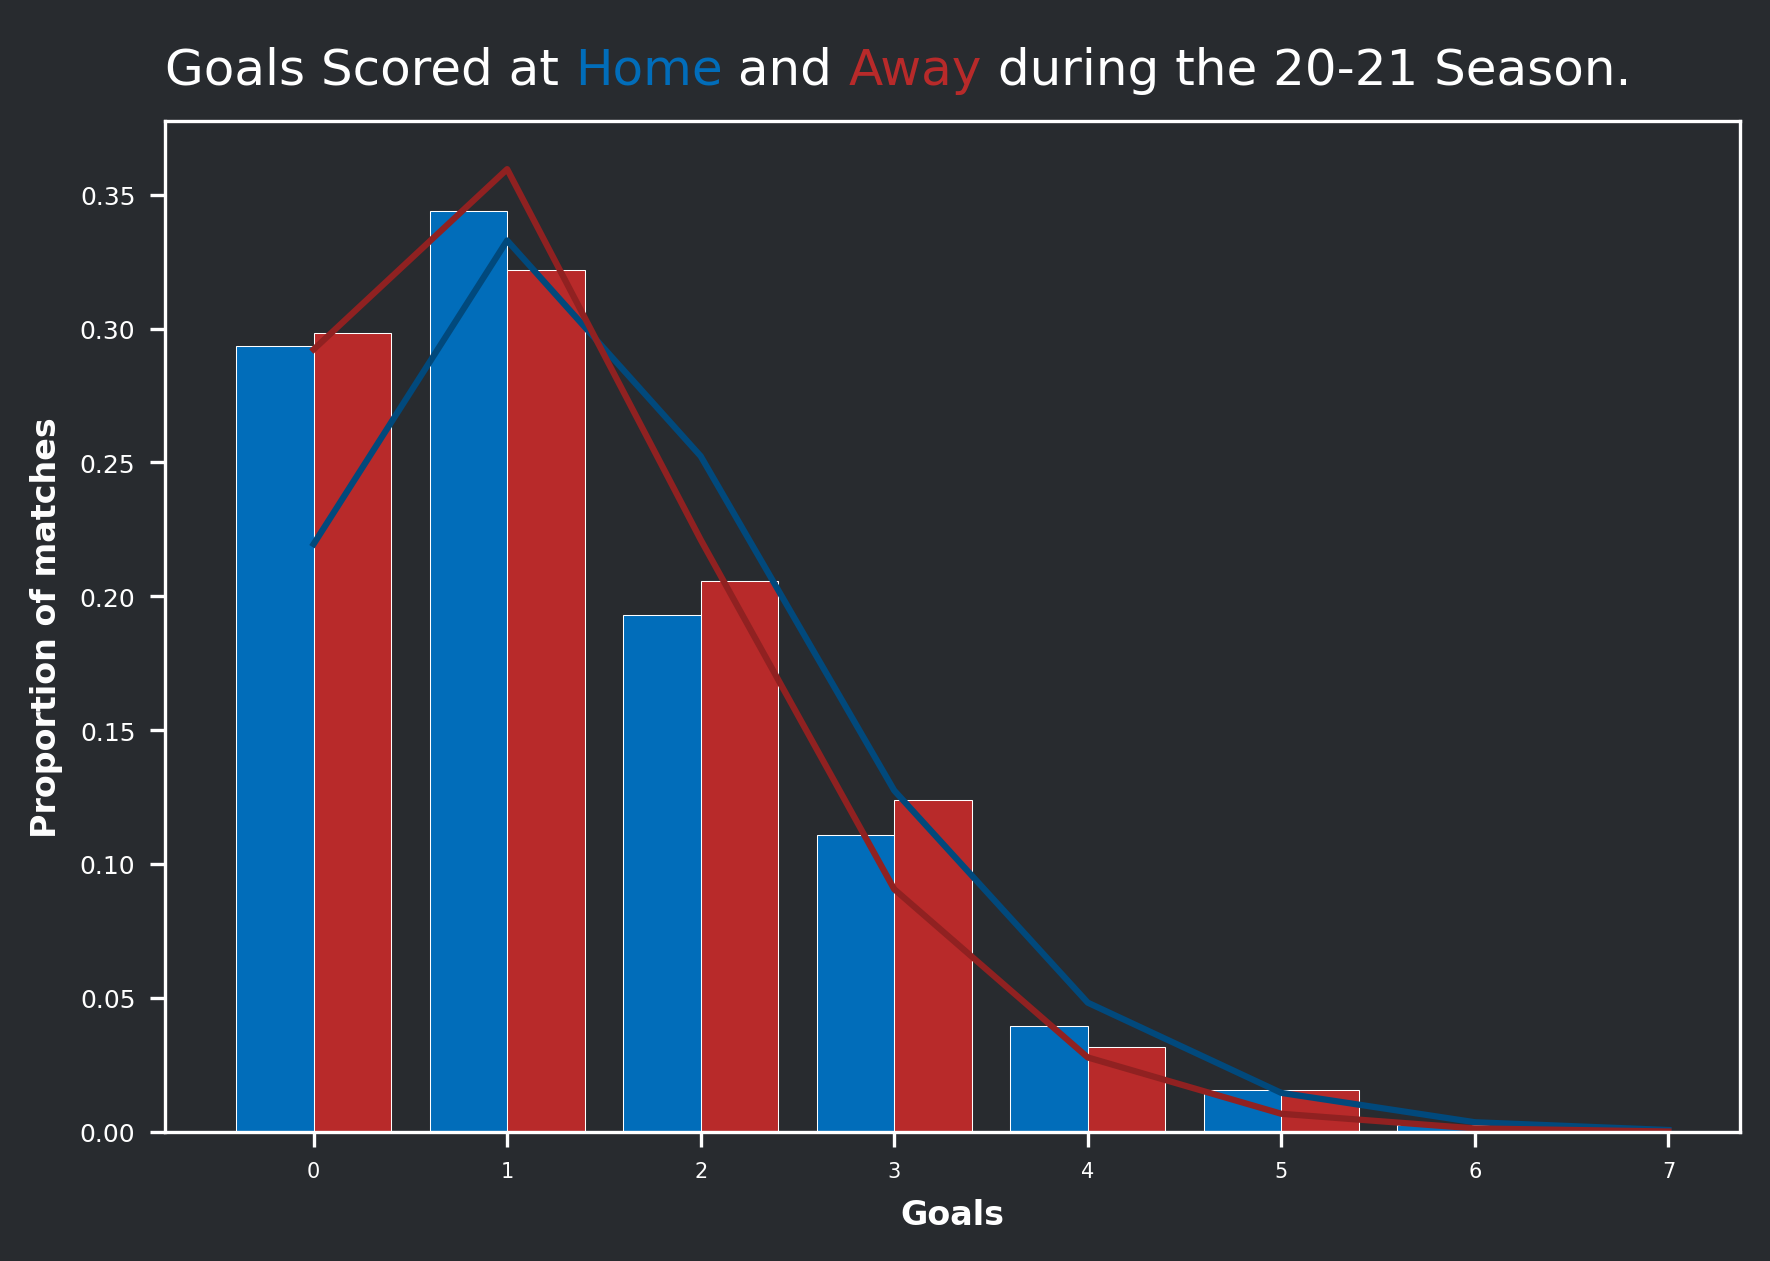

In [12]:
from scipy.stats import poisson

fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

max_goals = 8
_, _, _ = ax.hist(
    df[df['season'] == 2020][["score1", "score2"]].values, label=["Home", "Away"],
    bins=np.arange(0, max_goals)-.5, density=True,
    color=['#016DBA', '#B82A2A'], edgecolor='w', linewidth=0.25, alpha=1)

home_poisson = poisson.pmf(range(max_goals), df["score1"].mean())
away_poisson = poisson.pmf(range(max_goals), df["score2"].mean())

ax.plot(
    [i for i in range(0, max_goals)],
    home_poisson,
    linestyle="-",
    color="#01497c",
    label="Home Poisson",
)

ax.plot(
    [i for i in range(0, max_goals)],
    away_poisson,
    linestyle="-",
    color="#902121",
    label="Away Poisson",
)

ax.set_xticks(np.arange(0, max_goals), minor=False)
ax.set_xlabel(
    "Goals", fontfamily=title_font,
    fontweight="bold", fontsize=8, color=text_color)
ax.set_ylabel(
    "Proportion of matches", fontfamily=title_font,
    fontweight="bold", fontsize=8, color=text_color)

fig_text(x=0.1, y=1.025,
        s="Goals Scored at <Home> and <Away> during the 20-21 Season.",
        highlight_textprops=[
            {"color": '#016DBA'},
            {"color": '#B82A2A'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font,
        color=text_color, alpha=1)

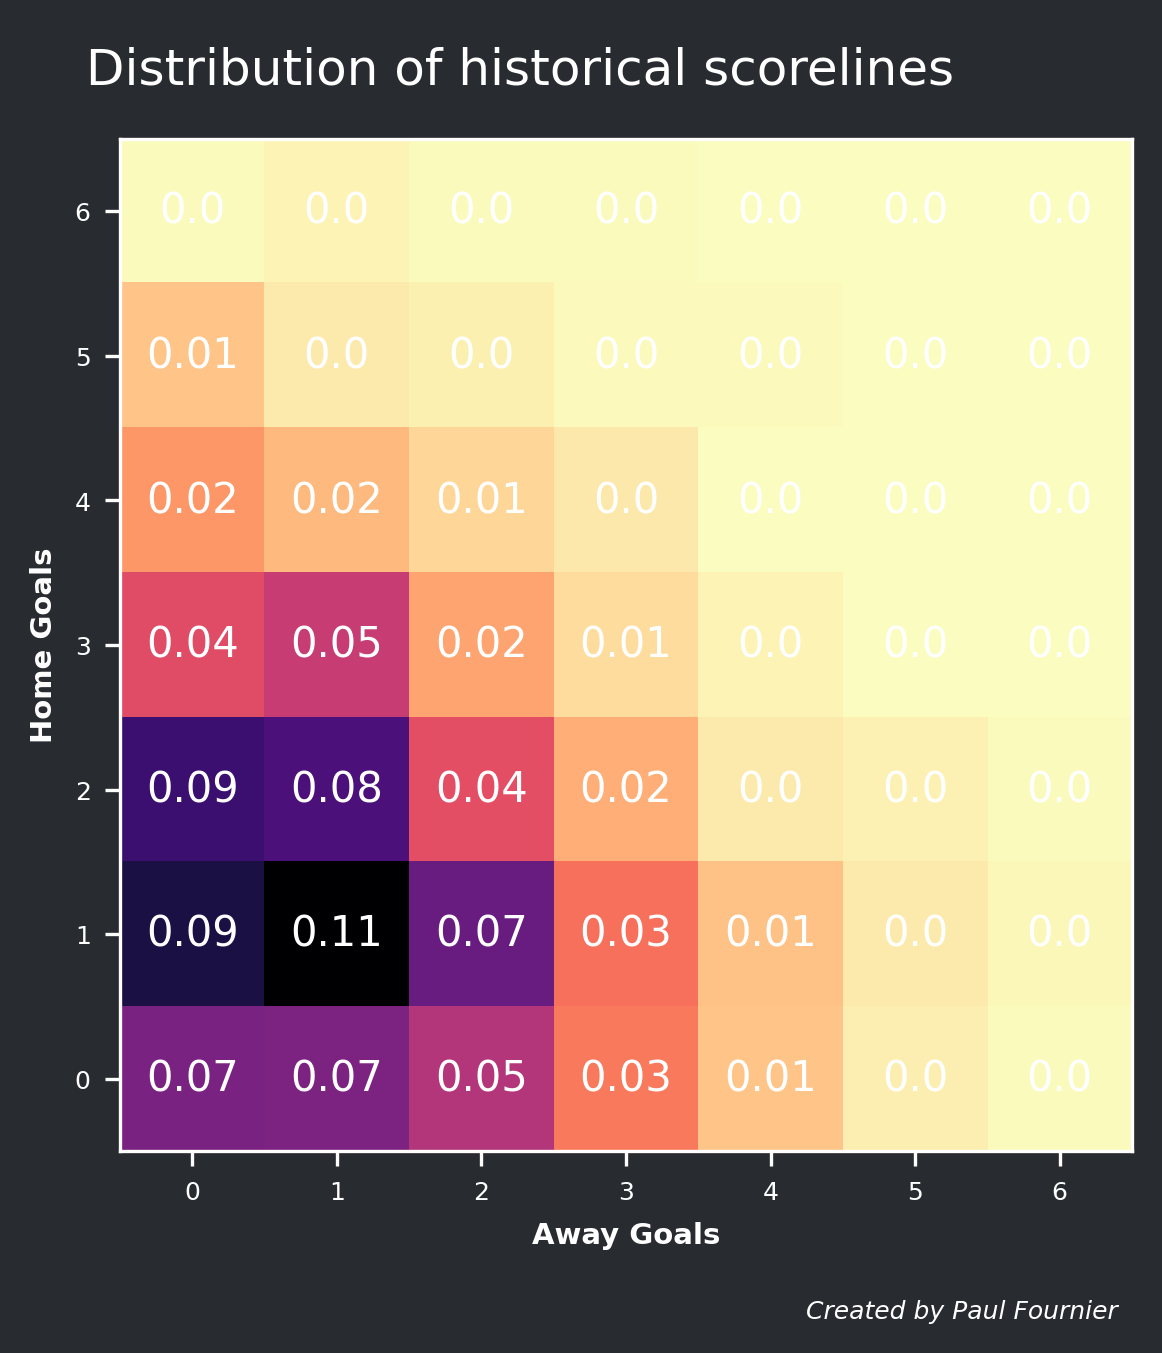

In [73]:
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

fig, ax = plt.subplots(tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

fig.text(
    0.6, -0.02, "Created by Paul Fournier", fontstyle="italic",
    fontsize=6, fontfamily='DejaVu Sans', color=text_color)

plt.imshow(heat, cmap='magma_r', interpolation='nearest')

heat = np.zeros((7, 7))
for i in range(7):
    for j in range(7):
        heat[6 - i, j] = df[(df["score1"] == i) & (df["score2"] == j)].shape[0]

for i in range(7):
    for j in range(7):
        text = ax.text(j, i, np.round(heat[i, j]/np.sum(heat), 2),
        ha="center", va="center")

ax.set_xticks(np.arange(0, 7))
ax.set_yticks(np.arange(0, 7))
ax.set_xticklabels(np.arange(0, 7))
ax.set_yticklabels(np.flip(np.arange(0, 7)))
ax.set_xlabel(
    f"Away Goals", fontfamily=title_font,
    fontweight="bold", fontsize=7, color=text_color)
ax.set_ylabel(
    f"Home Goals", fontfamily=title_font,
    fontweight="bold", fontsize=7, color=text_color)

fig_text(x=0.2, y=1.04,
        s=f"Distribution of historical scorelines",
        fontweight="regular", fontsize=12,
        fontfamily=title_font, color=text_color, alpha=1)

plt.show()